In [31]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, precision_recall_fscore_support, confusion_matrix, classification_report, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Datasets

In [2]:
df = pd.read_csv('../Data/new_data.csv')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62,110,80,1,1,0,0,1,0,21
1,55,1,156,85,140,90,3,1,0,0,1,1,34
2,51,1,165,64,130,70,3,1,0,0,0,1,23
3,48,2,169,82,150,100,1,1,0,0,1,1,28
4,47,1,156,56,100,60,1,1,0,0,0,0,23


## Machine Learning

### Train | Validation | Test Split Procedure

In [3]:
X = df.drop('cardio', axis=1)
y = df['cardio']

# Split the data into training and testing sets. 80% of data is training data, set aside other 20% for test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remaining 80% is split into valuation and test sets. 
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Scale the data using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Here, we are preparing data for use in a machine learning model that will predict whether someone has cardiovascular disease or not, based on various health-related features. Here is a breakdown of each step:

1. The first line `X = df.drop('cardio', axis=1)` selects all columns from the input dataframe except for the 'cardio' column. These are the features that the machine learning model will use to make its predictions. The second line `y = df['cardio']` selects only the 'cardio' column from the input dataframe. This is the column that contains the labels or outcomes we are trying to predict.

2. The third line uses the `train_test_split` function from the `sklearn library` to split the data into training and testing sets. We are using 80% of the data for training and 20% for testing. The `random_state` parameter is set to 42, which ensures that the data is split in the same way every time the code is run.

3. The fourth line further splits the training data into training and validation sets. We are using a `75/25` split (60% for training, 20% for validation) to tune our model's hyperparameters later.

4. The next three lines scale the data using standardization. Standardization scales the data to have a mean of 0 and a standard deviation of 1. This is useful for machine learning algorithms that assume the features are normally distributed. The `fit_transform` method fits the scaler on the training data and applies it to the training, validation, and testing data. We are overwriting the original `X_train` variable with the transformed data.

### Modelling

In [4]:
# Instantiate the models
log_reg = LogisticRegression()
ada = AdaBoostClassifier()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()

In [5]:
# Fit and evaluate the Logistic Regression model
log_reg.fit(X_train, y_train)
y_val_pred = log_reg.predict(X_val)
y_test_pred = log_reg.predict(X_test)
print("Logistic Regression")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cross_val_score(log_reg, X_train_val, y_train_val, cv=5).mean()}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

Logistic Regression
Accuracy on validation set: 0.7195714285714285
Accuracy on test set: 0.7200714285714286
Cross-validation score: 0.7173928571428572
Confusion matrix:
[[5321 1667]
 [2252 4760]]
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6988
           1       0.74      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000




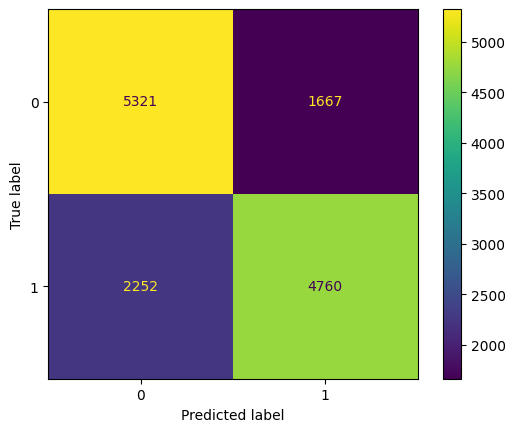

In [6]:
plot_confusion_matrix(log_reg, X_test, y_test);

* Accuracy on validation set: 0.7195714285714285
This means that the logistic regression model correctly classified `71.96%` of the instances in the validation set.

* Accuracy on test set: 0.7200714285714286
This means that the logistic regression model correctly classified `72.01%` of the instances in the test set.

* Cross-validation score: 0.7173928571428572
This is the average accuracy score of the logistic regression model during cross-validation, which is approximately `71.74%`.

* Confusion matrix: The confusion matrix shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) that the model predicted on the test set. In this case, the model correctly predicted `5321` true negatives and `4760` true positives, but incorrectly predicted `1667` false positives and `2252` false negatives.

* The classification report provides a summary of the model's performance on each class. The precision, recall, and F1-score metrics are calculated for both classes (0 and 1), as well as the macro and weighted averages across classes. In this case, the logistic regression model achieved a precision of `0.70` and recall of `0.76` for class 0, and a precision of `0.74` and recall of `0.68` for class 1. The overall accuracy on the test set was `0.72`.

In [7]:
# Fit and evaluate the Adaboost Classifier model
ada.fit(X_train, y_train)
y_val_pred = ada.predict(X_val)
y_test_pred = ada.predict(X_test)
print("Adaboost Classifier")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cross_val_score(ada, X_train_val, y_train_val, cv=5).mean()}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

Adaboost Classifier
Accuracy on validation set: 0.7338571428571429
Accuracy on test set: 0.7345
Cross-validation score: 0.7289642857142857
Confusion matrix:
[[5627 1361]
 [2356 4656]]
Classification report:
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6988
           1       0.77      0.66      0.71      7012

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000




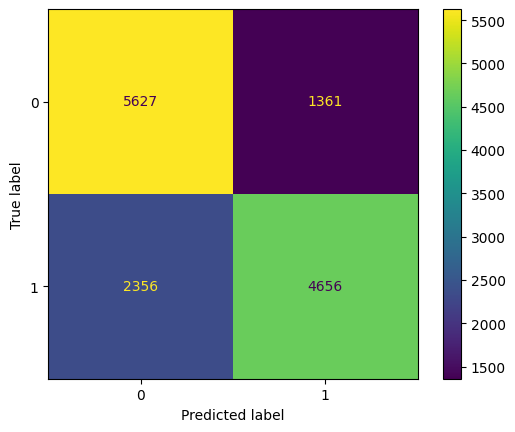

In [8]:
plot_confusion_matrix(ada, X_test, y_test);

* Accuracy on validation set: 0.7338571428571429
This means that the Adaboost Classifier model correctly classified `73.39%` of the instances in the validation set.

* Accuracy on test set: 0.7345
This means that the Adaboost Classifier model correctly classified `73.45%` of the instances in the test set.

* Cross-validation score: 0.7289642857142857
This is the average accuracy score of the Adaboost Classifier model during cross-validation, which is approximately `72.89%`.

* Confusion matrix: The confusion matrix shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) that the model predicted on the test set. In this case, the model correctly predicted `5627` true negatives and `4656` true positives, but incorrectly predicted `1361` false positives and `2356` false negatives.

* The classification report provides a summary of the model's performance on each class. The precision, recall, and F1-score metrics are calculated for both classes (0 and 1), as well as the macro and weighted averages across classes. In this case, the logistic regression model achieved a precision of 0.70 and recall of 0.81 for class 0, and a precision of 0.77 and recall of 0.66 for class 1. The overall accuracy on the test set was `0.74`.

In [9]:
# Fit and evaluate the Gradientboost Classifier model
gb.fit(X_train, y_train)
y_val_pred = gb.predict(X_val)
y_test_pred = gb.predict(X_test)
print("Gradientboost Classifier")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cross_val_score(gb, X_train_val, y_train_val, cv=5).mean()}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

Gradientboost Classifier
Accuracy on validation set: 0.7366428571428572
Accuracy on test set: 0.7383571428571428
Cross-validation score: 0.7351428571428571
Confusion matrix:
[[5363 1625]
 [2038 4974]]
Classification report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.75      0.71      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000




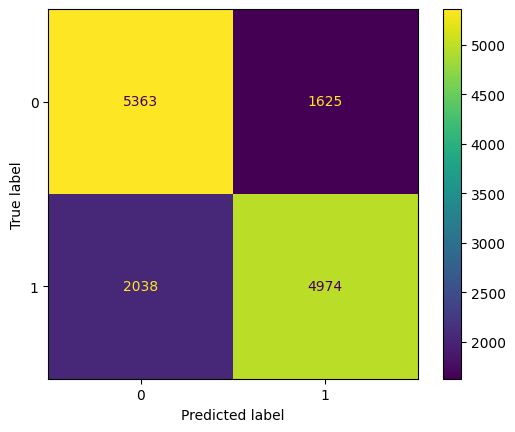

In [10]:
plot_confusion_matrix(gb, X_test, y_test);

* Accuracy on validation set: 0.7366428571428572
This means that the Gradientboost Classifier model correctly classified `73.66%` of the instances in the validation set.

* Accuracy on test set: 0.7383571428571428
This means that the Gradientboost Classifier model correctly classified `73.83%` of the instances in the test set.

* Cross-validation score: 0.7351428571428571
This is the average accuracy score of the Gradientboost Classifier model during cross-validation, which is approximately `73.51%`.

* Confusion matrix: The confusion matrix shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) that the model predicted on the test set. In this case, the model correctly predicted `5363` true negatives and `4974` true positives, but incorrectly predicted `1625` false positives and `2038` false negatives.

* The classification report provides a summary of the model's performance on each class. The precision, recall, and F1-score metrics are calculated for both classes (0 and 1), as well as the macro and weighted averages across classes. In this case, the logistic regression model achieved a precision of `0.72` and recall of `0.77` for class 0, and a precision of `0.75` and recall of `0.71` for class 1. The overall accuracy on the test set was `0.74`.

In [11]:
# Fit and evaluate the Random Forest Classifier model
rf.fit(X_train, y_train)
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)
print("Random Forest Classifier")
print(f"Accuracy on validation set: {accuracy_score(y_val, y_val_pred)}")
print(f"Accuracy on test set: {accuracy_score(y_test, y_test_pred)}")
print(f"Cross-validation score: {cross_val_score(rf, X_train_val, y_train_val, cv=5).mean()}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_test_pred)}")
print(f"Classification report:\n{classification_report(y_test, y_test_pred)}\n")

Random Forest Classifier
Accuracy on validation set: 0.7121428571428572
Accuracy on test set: 0.7099285714285715
Cross-validation score: 0.7095178571428572
Confusion matrix:
[[4987 2001]
 [2060 4952]]
Classification report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      6988
           1       0.71      0.71      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000




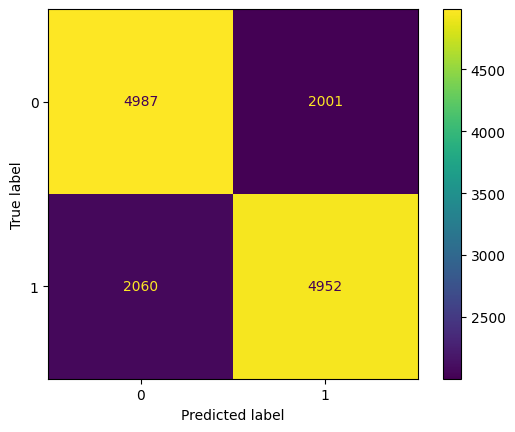

In [12]:
plot_confusion_matrix(rf, X_test, y_test);

* Accuracy on validation set:  0.7121428571428572
This means that the Random Forest Classifier model correctly classified `71.21%` of the instances in the validation set.

* Accuracy on test set: 0.7099285714285715
This means that the Random Forest Classifier model correctly classified `70.99%` of the instances in the test set.

* Cross-validation score: 0.7095178571428572
This is the average accuracy score of the Random Forest Classifier model during cross-validation, which is approximately `70.95%`.

* Confusion matrix: The confusion matrix shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) that the model predicted on the test set. In this case, the model correctly predicted `4987` true negatives and `4952` true positives, but incorrectly predicted `2001` false positives and `2060` false negatives.

* The classification report provides a summary of the model's performance on each class. The precision, recall, and F1-score metrics are calculated for both classes (0 and 1), as well as the macro and weighted averages across classes. In this case, the logistic regression model achieved a precision of `0.71` and recall of `0.71` for class 0, and a precision of `0.71` and recall of `0.71` for class 1. The overall accuracy on the test set was `0.71`.

### Hyperparameter Tuning

After checking the performance metrics of each of our model, `Adaboost Classifier` and `Gradientboost Classifier` showed promising results and had higher accuracy, cross-validation scores compared to the other models, therefore we selected them for hyperparameter tuning to further optimize their performance.

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define parameter distributions for RandomizedSearchCV
ada_param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.5),
    'algorithm': ['SAMME', 'SAMME.R']
}

gb_param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.5),
    'subsample': uniform(0.1, 0.9),
    'max_depth': randint(3, 10),
    'max_features': ['sqrt', 'log2', None]
}

In [14]:
# Create the Adaboost classifier and perform RandomizedSearchCV
ada = AdaBoostClassifier(random_state=42)
ada_random = RandomizedSearchCV(estimator=ada, param_distributions=ada_param_dist, n_iter=50,
                                cv=5, random_state=42, n_jobs=-1, verbose=2)
ada_random.fit(X_train, y_train)

# Print the best parameters and score for each classifier
print("Best parameters for Adaboost:", ada_random.best_params_)
print("Best score for Adaboost:", ada_random.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END algorithm=SAMME, learning_rate=0.40827149343011643, n_estimators=64; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.40827149343011643, n_estimators=64; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.40827149343011643, n_estimators=64; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.40827149343011643, n_estimators=64; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.40827149343011643, n_estimators=64; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.39984550013638465, n_estimators=70; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.39984550013638465, n_estimators=70; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.39984550013638465, n_estimators=70; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.39984550013638465, n_estimators=70; total time=   0.7s
[CV] END algorithm=SAMME, learning_rate=0.39984550013638465, n_es

In [18]:
# Train Adaboost Classifier with the best hyperparameters
ada_best = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.3975664116805573, n_estimators=211, random_state=42)
ada_best.fit(X_train, y_train)

# Evaluate the model on validation set
y_pred = ada_best.predict(X_val)
acc_val = accuracy_score(y_val, y_pred)

# Evaluate the model on test set
y_pred = ada_best.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(ada_best, X_train_val, y_train_val, cv=5)

# Print the performance metrics
print("AdaBoost Classifier")
print("Accuracy on validation set: {:.2f}%".format(acc_val*100))
print("Accuracy on test set: {:.2f}%".format(acc_test*100))
print("Cross-validation score: {:.2f}% (+/- {:.2f}%)".format(cv_scores.mean()*100, cv_scores.std()*2*100))
print("Classification report:\n", classification_report(y_test, y_pred))

AdaBoost Classifier
Accuracy on validation set: 73.59%
Accuracy on test set: 73.51%
Cross-validation score: 72.92% (+/- 0.62%)
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      6988
           1       0.78      0.66      0.71      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.73     14000
weighted avg       0.74      0.74      0.73     14000



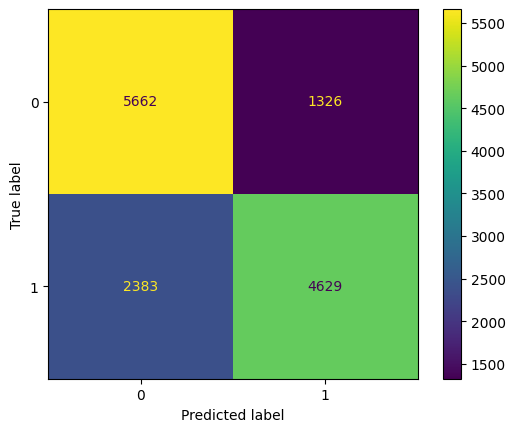

In [19]:
plot_confusion_matrix(ada_best, X_test, y_test);

In [15]:
# Create the Gradientboost classifier and perform RandomizedSearchCV
gb = GradientBoostingClassifier(random_state=42)
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=gb_param_dist, n_iter=50,
                               cv=5, random_state=42, n_jobs=-1, verbose=2)
gb_random.fit(X_train, y_train)
print("Best parameters for GradientBoost:", gb_random.best_params_)
print("Best score for GradientBoost:", gb_random.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END learning_rate=0.19727005942368125, max_depth=7, max_features=None, n_estimators=156, subsample=0.8017219002454924; total time=   6.7s
[CV] END learning_rate=0.19727005942368125, max_depth=7, max_features=None, n_estimators=156, subsample=0.8017219002454924; total time=   6.8s
[CV] END learning_rate=0.19727005942368125, max_depth=7, max_features=None, n_estimators=156, subsample=0.8017219002454924; total time=   6.7s
[CV] END learning_rate=0.19727005942368125, max_depth=7, max_features=None, n_estimators=156, subsample=0.8017219002454924; total time=   6.7s
[CV] END learning_rate=0.19727005942368125, max_depth=7, max_features=None, n_estimators=156, subsample=0.8017219002454924; total time=   6.7s
[CV] END learning_rate=0.3084250789732435, max_depth=4, max_features=None, n_estimators=264, subsample=0.15227525095137953; total time=   2.5s
[CV] END learning_rate=0.3084250789732435, max_depth=4, max_features=None, n_est

In [21]:
# Train GradientBoosting Classifier with the best hyperparameters
gradboost_best = GradientBoostingClassifier(learning_rate= 0.02153121252070788, max_depth= 5, max_features= None, n_estimators= 219, subsample= 0.1419990968922539, random_state=42)
gradboost_best.fit(X_train, y_train)

# Evaluate the model on validation set
y_pred = gradboost_best.predict(X_val)
acc_val = accuracy_score(y_val, y_pred)

# Evaluate the model on test set
y_pred = gradboost_best.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(gradboost_best, X_train_val, y_train_val, cv=5)

# Print the performance metrics
print("GradientBoost Classifier")
print("Accuracy on validation set: {:.2f}%".format(acc_val*100))
print("Accuracy on test set: {:.2f}%".format(acc_test*100))
print("Cross-validation score: {:.2f}% (+/- {:.2f}%)".format(cv_scores.mean()*100, cv_scores.std()*2*100))
print("Classification report:\n", classification_report(y_test, y_pred))

GradientBoost Classifier
Accuracy on validation set: 73.92%
Accuracy on test set: 73.77%
Cross-validation score: 73.56% (+/- 0.83%)
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.75      6988
           1       0.75      0.71      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



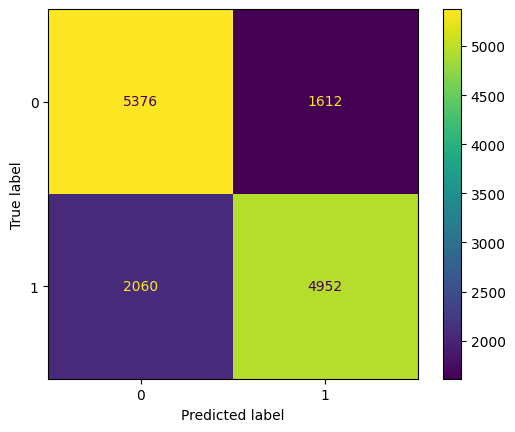

In [22]:
plot_confusion_matrix(gradboost_best, X_test, y_test);

In this code, we define parameter distributions for `AdaBoostClassifier` and `GradientBoostingClassifier` using the `randint` and `uniform` functions from the scipy.stats module. Then, we create the classifiers and perform RandomizedSearchCV using the `RandomizedSearchCV` function from scikit-learn. Finally, we print the best parameters and score for each classifier. You can adjust the parameter distributions and other settings as needed for your specific use case.

In [28]:
from sklearn.model_selection import GridSearchCV

# Define parameter distributions for GridSearchCV

# Adaboost Classifier
ada_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Gradientboost Classifier
gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10]
}

In [24]:
ada_clf = AdaBoostClassifier(random_state=42)

ada_grid = GridSearchCV(ada_clf, param_grid=ada_params, cv=5, n_jobs=-1, scoring='accuracy')
ada_grid.fit(X_train, y_train)

print("Best Adaboost params:", ada_grid.best_params_)
print("Best Adaboost accuracy:", ada_grid.best_score_)

Best Adaboost params: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 150}
Best Adaboost accuracy: 0.7284761904761905


In [26]:
# Train Adaboost Classifier with the best hyperparameters
ada_grid_best = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1, n_estimators=150, random_state=42)
ada_grid_best.fit(X_train, y_train)

# Evaluate the model on validation set
y_pred = ada_grid_best.predict(X_val)
acc_val = accuracy_score(y_val, y_pred)

# Evaluate the model on test set
y_pred = ada_grid_best.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(ada_grid_best, X_train_val, y_train_val, cv=5)

# Print the performance metrics
print("AdaBoost Classifier")
print("Accuracy on validation set: {:.2f}%".format(acc_val*100))
print("Accuracy on test set: {:.2f}%".format(acc_test*100))
print("Cross-validation score: {:.2f}% (+/- {:.2f}%)".format(cv_scores.mean()*100, cv_scores.std()*2*100))
print("Classification report:\n", classification_report(y_test, y_pred))

AdaBoost Classifier
Accuracy on validation set: 73.49%
Accuracy on test set: 73.30%
Cross-validation score: 72.99% (+/- 0.76%)
Classification report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      6988
           1       0.77      0.66      0.71      7012

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



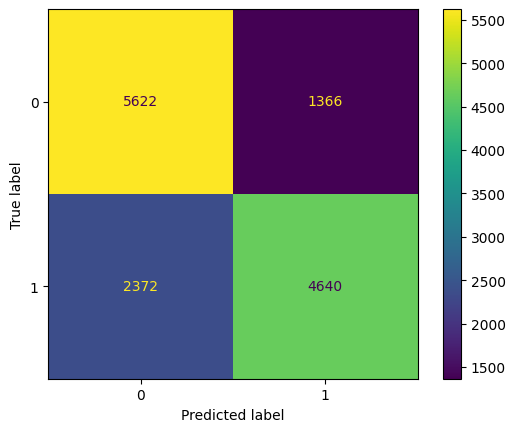

In [27]:
plot_confusion_matrix(ada_grid_best, X_test, y_test);

In [29]:
gb_clf = GradientBoostingClassifier(random_state=42)

gb_grid = GridSearchCV(gb_clf, param_grid=gb_params, cv=5, n_jobs=-1, scoring='accuracy')
gb_grid.fit(X_train, y_train)

print("Best GradientBoosting params:", gb_grid.best_params_)
print("Best GradientBoosting accuracy:", gb_grid.best_score_)

Best GradientBoosting params: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'min_samples_split': 10, 'n_estimators': 50}
Best GradientBoosting accuracy: 0.7342857142857142


In [30]:
# Train Adaboost Classifier with the best hyperparameters
gradboost_grid_best = GradientBoostingClassifier(learning_rate= 0.1, max_depth= 5, max_features= None, min_samples_split = 10, n_estimators=50, random_state=42)
gradboost_grid_best.fit(X_train, y_train)

# Evaluate the model on validation set
y_pred = gradboost_grid_best.predict(X_val)
acc_val = accuracy_score(y_val, y_pred)

# Evaluate the model on test set
y_pred = gradboost_grid_best.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(gradboost_grid_best, X_train_val, y_train_val, cv=5)

# Print the performance metrics
print("AdaBoost Classifier")
print("Accuracy on validation set: {:.2f}%".format(acc_val*100))
print("Accuracy on test set: {:.2f}%".format(acc_test*100))
print("Cross-validation score: {:.2f}% (+/- {:.2f}%)".format(cv_scores.mean()*100, cv_scores.std()*2*100))
print("Classification report:\n", classification_report(y_test, y_pred))

AdaBoost Classifier
Accuracy on validation set: 73.85%
Accuracy on test set: 73.96%
Cross-validation score: 73.47% (+/- 0.56%)
Classification report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



This code defines a range of hyperparameters for both `Adaboost` and `GradientBoosting` classifiers and performs a grid search with cross-validation to find the best set of hyperparameters that maximize accuracy. The `GridSearchCV` object is defined with `cv=5` to use 5-fold cross-validation and `n_jobs=-1` to use all available CPU cores for parallel processing. The scoring parameter is set to `'accuracy'` to optimize for accuracy.

After running the code, the best set of hyperparameters and the corresponding `accuracy` score are printed for each model.

### Appending all models

In [ ]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy on validation set', 'Accuracy on test set', 'Cross-validation score', 'Confusion matrix', 'Classification report'])

# Fit and evaluate the Logistic Regression model
log_reg.fit(X_train, y_train)
y_val_pred = log_reg.predict(X_val)
y_test_pred = log_reg.predict(X_test)
model_name = 'Logistic Regression'
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_score = cross_val_score(log_reg, X_train_val, y_train_val, cv=5).mean()
confusion = confusion_matrix(y_test, y_test_pred)
classification = classification_report(y_test, y_test_pred)
results_df = results_df.append({'Model': model_name, 
                                'Accuracy on validation set': val_accuracy, 
                                'Accuracy on test set': test_accuracy, 
                                'Cross-validation score': cv_score, 
                                'Confusion matrix': confusion, 
                                'Classification report': classification}, 
                               ignore_index=True)


In [ ]:
# Fit and evaluate the Adaboost Classifier model
ada.fit(X_train, y_train)
y_val_pred = ada.predict(X_val)
y_test_pred = ada.predict(X_test)
model_name = 'Adaboost Classifier'
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_score = cross_val_score(ada, X_train_val, y_train_val, cv=5).mean()
confusion = confusion_matrix(y_test, y_test_pred)
classification = classification_report(y_test, y_test_pred)
results_df = results_df.append({'Model': model_name, 
                                'Accuracy on validation set': val_accuracy, 
                                'Accuracy on test set': test_accuracy, 
                                'Cross-validation score': cv_score, 
                                'Confusion matrix': confusion, 
                                'Classification report': classification}, 
                               ignore_index=True)

In [ ]:
# Fit and evaluate the Gradientboost Classifier model
gb.fit(X_train, y_train)
y_val_pred = gb.predict(X_val)
y_test_pred = gb.predict(X_test)
model_name = 'Gradientboost Classifier'
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_score = cross_val_score(gb, X_train_val, y_train_val, cv=5).mean()
confusion = confusion_matrix(y_test, y_test_pred)
classification = classification_report(y_test, y_test_pred)
results_df = results_df.append({'Model': model_name, 
                                'Accuracy on validation set': val_accuracy, 
                                'Accuracy on test set': test_accuracy, 
                                'Cross-validation score': cv_score, 
                                'Confusion matrix': confusion, 
                                'Classification report': classification}, 
                               ignore_index=True)

In [ ]:
# Fit and evaluate the Random Forest Classifier model
rf.fit(X_train, y_train)
y_val_pred = rf.predict(X_val)
y_test_pred = rf.predict(X_test)
model_name = 'Random Forest Classifier'
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
cv_score = cross_val_score(rf, X_train_val, y_train_val, cv=5).mean()
confusion = confusion_matrix(y_test, y_test_pred)
classification = classification_report(y_test, y_test_pred)
results_df = results_df.append({'Model

In [33]:
# Define the models
models = [
    ('Logistic Regression', log_reg),
    ('Adaboost Classifier', ada),
    ('Gradientboost Classifier', gb),
    ('Random Forest Classifier', rf),
    ('AdaBoost Classifier Best', ada_best),
    ('GradientBoost Classifier Best', gradboost_best),
    ('AdaBoost Classifier GridSearch Best', ada_grid_best),
    ('GradientBoost Classifier GridSearch Best', gradboost_grid_best)
]

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Evaluate each model and append the results to the DataFrame
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Evaluate the model on the validation set
    y_val_pred = model.predict(X_val)
    acc_val = accuracy_score(y_val, y_val_pred)
    p_val, r_val, f1_val, _ = precision_recall_fscore_support(y_val, y_val_pred, average='weighted')

    # Evaluate the model on the test set
    y_test_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    p_test, r_test, f1_test, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

    # Append the results to the DataFrame
    results_df = results_df.append({
        'Model': model_name,
        'Accuracy': f'Val: {acc_val:.3f}, Test: {acc_test:.3f}',
        'Precision': f'Val: {p_val:.3f}, Test: {p_test:.3f}',
        'Recall': f'Val: {r_val:.3f}, Test: {r_test:.3f}',
        'F1-Score': f'Val: {f1_val:.3f}, Test: {f1_test:.3f}'
    }, ignore_index=True)

# Print the results
print(results_df)


                                      Model                 Accuracy  \
0                       Logistic Regression  Val: 0.720, Test: 0.720   
1                       Adaboost Classifier  Val: 0.734, Test: 0.735   
2                  Gradientboost Classifier  Val: 0.737, Test: 0.738   
3                  Random Forest Classifier  Val: 0.714, Test: 0.710   
4                  AdaBoost Classifier Best  Val: 0.736, Test: 0.735   
5             GradientBoost Classifier Best  Val: 0.739, Test: 0.738   
6       AdaBoost Classifier GridSearch Best  Val: 0.735, Test: 0.733   
7  GradientBoost Classifier GridSearch Best  Val: 0.739, Test: 0.740   

                 Precision                   Recall                 F1-Score  
0  Val: 0.721, Test: 0.722  Val: 0.720, Test: 0.720  Val: 0.719, Test: 0.720  
1  Val: 0.739, Test: 0.739  Val: 0.734, Test: 0.735  Val: 0.733, Test: 0.733  
2  Val: 0.738, Test: 0.739  Val: 0.737, Test: 0.738  Val: 0.736, Test: 0.738  
3  Val: 0.714, Test: 0.710  Val: 0.

This created a DataFrame with columns for the model name, accuracy, precision, recall, and f1-score for both the validation and test sets. With `GradientBoost Classifier GridSearchCV` performing better across all performance metrics.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ff326574-3ec1-47f6-99a1-8d027e4792c0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>